# 11.1 逼近法
回归和插值是金融学最常用数学技术之一

In [4]:
import numpy as np
from pylab import plt,mpl
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [5]:
def f(x):#定义主函数
    return np.sin(x) + 0.5 * x
def create_plot(x,y,styles,labels,axlabels):#定义绘图函数
    plt.figure()#创建画布
    for i in range(len(x)):
        plt.plot(x[i],y[i],styles[i],label=labels[i])
        plt.xlabel(axlabels[0])
        plt.ylabel(axlabels[1])
    plt.legend(loc=0)

In [6]:
x = np.linspace(-2 * np.pi,2 * np.pi,50)#设置x的值-2pi--2pi

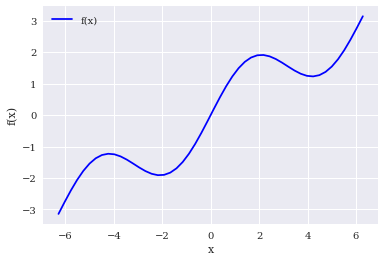

In [7]:
create_plot([x],[f(x)],['b'],['f(x)'],['x','f(x)'])

<ipython-input-8-81e802f6fa6a>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


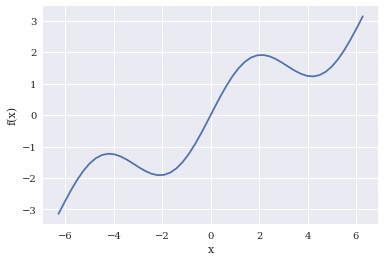

In [8]:
import matplotlib.pyplot as plt
fig = plt.figure()#创建画布
axes1 = fig.add_subplot(1,1,1)#创建1*1画布，指定axes1为第一个，其实也只有一个子图
axes1.plot(x,f(x))
axes1.set_xlabel('x')
axes1.set_ylabel('f(x)')
fig.show()

### 11.1.1 回归

### 1.作为基函数的单项式

#### 一次单项式回归 
无法回归sin部分

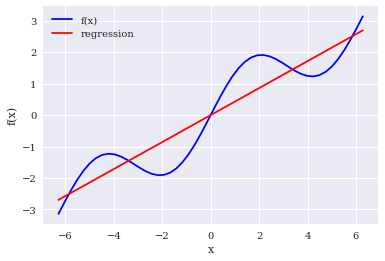

In [21]:
res = np.polyfit(x,f(x),deg=1,full=True)#回归
res#回归参数、残差、有效秩、奇异值和相对条件数
ry = np.polyval(res[0],x)#用回归参数求回归y
create_plot([x,x],[f(x),ry],#x轴和y轴的数据
            ['b','r'],#颜色
            ['f(x)','regression'],#图例
            ['x','f(x)'])#xy轴命名

#### 5次单项式回归

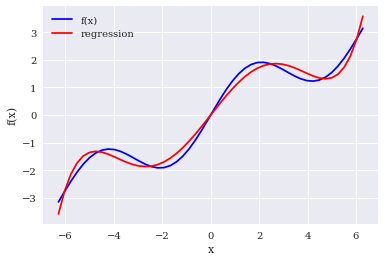

In [22]:
res = np.polyfit(x,f(x),deg=5,full=True)#5次回归
res#回归参数、残差、有效秩、奇异值和相对条件数
ry = np.polyval(res[0],x)#用回归参数求回归y
create_plot([x,x],[f(x),ry],#x轴和y轴的数据
            ['b','r'],#颜色
            ['f(x)','regression'],#图例
            ['x','f(x)'])#xy轴命名

#### 7次单项式回归

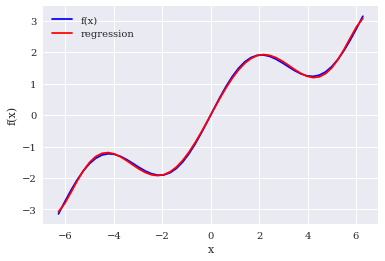

In [24]:
res = np.polyfit(x,f(x),deg=7,full=True)#7次回归
res#回归参数、残差、有效秩、奇异值和相对条件数
ry = np.polyval(res[0],x)#用回归参数求回归y
create_plot([x,x],[f(x),ry],#x轴和y轴的数据
            ['b','r'],#颜色
            ['f(x)','regression'],#图例
            ['x','f(x)'])#xy轴命名

### 2.单独的基函数
单独基函数必须通过一个矩阵方法定义

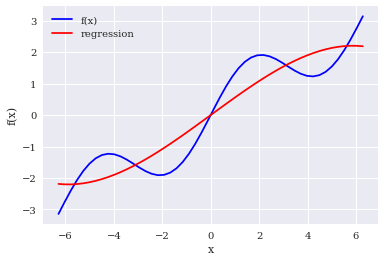

In [26]:
matrix = np.zeros((3 + 1,len(x)))
matrix[3,:] = x**3#定义最高为3次
matrix[2,:] = x**2#2次
matrix[1,:] = x#1次
matrix[0,:] = 1#0次
reg = np.linalg.lstsq(matrix.T,f(x),rcond=None)[0]#最优回归参数
ry = np.dot(reg, matrix)#函数值的回归估算
create_plot([x,x],[f(x),ry],#x轴和y轴的数据
            ['b','r'],#颜色
            ['f(x)','regression'],#图例
            ['x','f(x)'])#xy轴命名

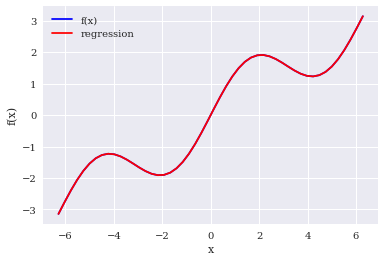

In [30]:
#改变基函数，用正弦基函数
matrix[3,:] = np.sin(x)
reg = np.linalg.lstsq(matrix.T,f(x),rcond=None)[0]#最优回归参数
ry = np.dot(reg, matrix)#函数值的回归估算
create_plot([x,x],[f(x),ry],#x轴和y轴的数据
            ['b','r'],#颜色
            ['f(x)','regression'],#图例
            ['x','f(x)'])#xy轴命名

### 3.有噪声的数据的回归
可以平滑噪音数据

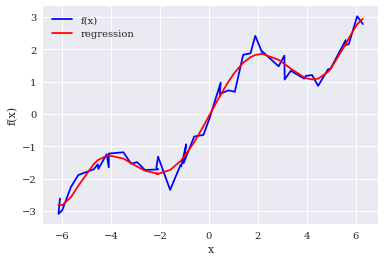

In [34]:
xn = np.linspace(-2 * np.pi,2 * np.pi,50)
xn = xn + 0.15 * np.random.standard_normal(len(xn))#在x值里引入噪声
yn = f(xn) +0.25 * np.random.standard_normal(len(xn))#在y值了引入噪声
reg = np.polyfit(xn, yn, 7)
ry = np.polyval(reg,xn)
create_plot([xn,xn],[yn,ry],#x轴和y轴的数据
            ['b','r'],#颜色
            ['f(x)','regression'],#图例
            ['x','f(x)'])#xy轴命名

### 4.回归处理未排序数据 

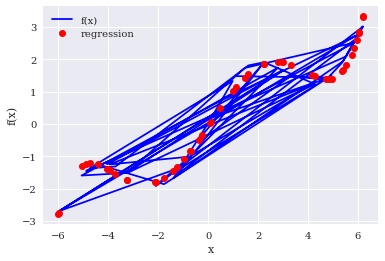

In [36]:
xu = np.random.rand(50) *4 * np.pi - 2 * np.pi#生成未排序随机x
yu = f(xu)
reg = np.polyfit(xu, yu, 5)
ry = np.polyval(reg, xu)
create_plot([xu,xu],[yu,ry],#x轴和y轴的数据
            ['b','ro'],#颜色
            ['f(x)','regression'],#图例
            ['x','f(x)'])#xy轴命名

### 5.多维 (双参数的回归曲面)
不需要太多修改就可用于多维

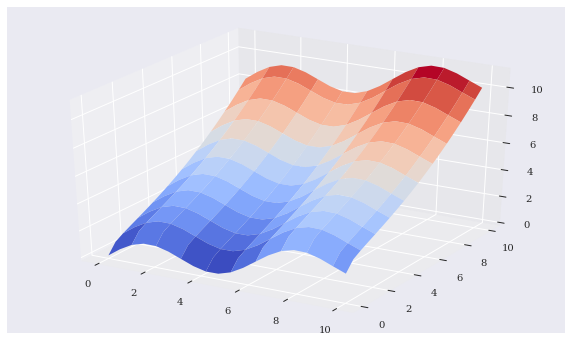

In [9]:
import numpy as np
def fm(p):#定义二元函数
    x,y=p
    return np.sin(x) + 0.25 * x+ np.sqrt(y) + 0.05 * y ** 2
x = np.linspace(0, 10 ,20)
y = np.linspace(0, 10, 20)
X, Y = np.meshgrid(x, y)#生成网格点坐标矩阵
z = fm((X, Y))
x = X.flatten()
y = Y.flatten()#将横坐标矩阵和纵坐标矩阵变成一维
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, z, rstride=2, cstride=2, cmap='coolwarm', linewidth=0.5, antialiased=True )

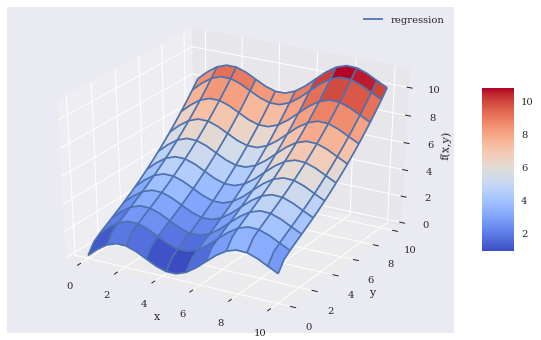

In [13]:
matrix = np.zeros((len(x), 6 + 1))#设置基函数
matrix[:, 6] = np.sqrt(y)
matrix[:, 5] = np.sin(x)
matrix[:, 4] = y ** 2
matrix[:, 3] = x ** 2
matrix[:, 2] = y
matrix[:, 1] = x
matrix[:, 0] = 1
reg = np.linalg.lstsq(matrix, fm((x, y)), rcond=None)[0]#回归获得的参数
RZ = np.dot(matrix, reg).reshape((20, 20))#将回归结果转化为网格结构
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
surf1 = ax.plot_surface(X, Y, z,rstride=2, cstride=2, cmap=mpl.cm.coolwarm, linewidth=0.5, antialiased=True)#绘制原始函数曲面
surf2 = ax.plot_wireframe(X,Y,RZ,rstride=2,cstride=2,label='regression')#绘制回归曲面
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
ax.legend()
fig.colorbar(surf, shrink=0.5, aspect=5)





### 11.1.2 插值

In [17]:
import scipy.interpolate as spi
x = np.linspace(- 2 * np.pi,2 * np.pi, 25)
def f(x):
    return np.sin(x) + 0.5 * x
ipo = spi.splrep(x, f(x), k=1)#实现线性样条插值,一次样条插值
iy = spi.splev(x, ipo)#得出内插值
iy

array([-3.14159265, -2.37979327, -1.75196847, -1.35619449, -1.2283697 ,
       -1.33259571, -1.57079633, -1.80899694, -1.91322295, -1.78539816,
       -1.38962418, -0.76179939,  0.        ,  0.76179939,  1.38962418,
        1.78539816,  1.91322295,  1.80899694,  1.57079633,  1.33259571,
        1.2283697 ,  1.35619449,  1.75196847,  2.37979327,  3.14159265])

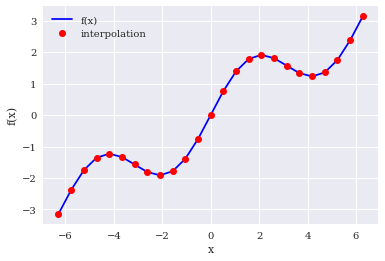

In [16]:
create_plot([x, x],[f(x), iy],['b', 'ro'],['f(x)','interpolation'],['x','f(x)'])#将原函数和插值后的值可视化

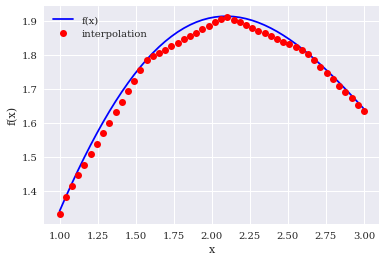

In [18]:
xd = np.linspace(1.0, 3.0, 50)#用更细的数据集进行插值
iyd = spi.splev(xd, ipo)
create_plot([xd, xd],[f(xd), iyd],['b', 'ro'],['f(x)','interpolation'],['x','f(x)'])#将原函数和插值后的值可视化

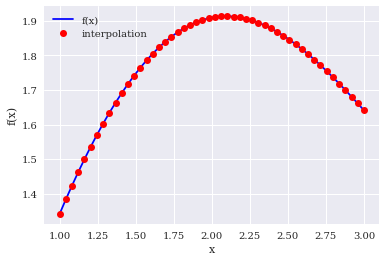

In [19]:
xd = np.linspace(1.0, 3.0, 50)#用更细的数据集进行插值
ipo = spi.splrep(x, f(x), k=3)#实现3次样条插值
iyd = spi.splev(xd, ipo)
create_plot([xd, xd],[f(xd), iyd],['b', 'ro'],['f(x)','interpolation'],['x','f(x)'])#将原函数和插值后的值可视化

## 11.2 凸优化
一些金融工具（如衍生品定价模型检验，代理人效用函数优化）需要凸优化工具

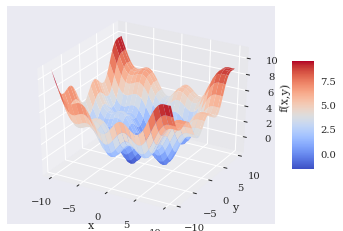

In [26]:
def fm(p):
    x, y = p
    return(np.sin(x) + 0.05 * x **2
          + np.sin(y) + 0.05 * y ** 2)
x = np.linspace(-10, 10, 50)
y = np.linspace(-10,10,50)
X, Y = np.meshgrid(x,y)#生成网格点坐标矩阵
Z = fm((X,Y))
fig = plt.figure()
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X,Y,Z,rstride=2,cstride=2,cmap='coolwarm',linewidth=0.5,antialiased=True)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x,y)')
fig.colorbar(surf, shrink=0.5,aspect=5)

## 11.2.1全局优化
找到最小值或者等式的数值解的问题

In [41]:
import scipy.optimize as sco
def fo(p):
    x, y =p
    z = np.sin(x) + 0.05 * x **2 + np.sin(y) +0.05 * y ** 2
    if output == True:#如果为true，打印信息
        print('%8.4f | %8.4f | %8.4f' % (x,y,z))
    return z
output = True
sco.brute(fo, ((-10,10.1,5), (-10,10.1,5)),finish=None)#暴力优化，步长为5

-10.0000 | -10.0000 |  11.0880
-10.0000 |  -5.0000 |   7.7529
-10.0000 |   0.0000 |   5.5440
-10.0000 |   5.0000 |   5.8351
-10.0000 |  10.0000 |  10.0000
 -5.0000 | -10.0000 |   7.7529
 -5.0000 |  -5.0000 |   4.4178
 -5.0000 |   0.0000 |   2.2089
 -5.0000 |   5.0000 |   2.5000
 -5.0000 |  10.0000 |   6.6649
  0.0000 | -10.0000 |   5.5440
  0.0000 |  -5.0000 |   2.2089
  0.0000 |   0.0000 |   0.0000
  0.0000 |   5.0000 |   0.2911
  0.0000 |  10.0000 |   4.4560
  5.0000 | -10.0000 |   5.8351
  5.0000 |  -5.0000 |   2.5000
  5.0000 |   0.0000 |   0.2911
  5.0000 |   5.0000 |   0.5822
  5.0000 |  10.0000 |   4.7471
 10.0000 | -10.0000 |  10.0000
 10.0000 |  -5.0000 |   6.6649
 10.0000 |   0.0000 |   4.4560
 10.0000 |   5.0000 |   4.7471
 10.0000 |  10.0000 |   8.9120


array([0., 0.])

In [43]:
output = False #不打印信息
opt1 = sco.brute(fo, ((-10,10.1,0.1), (-10,10.1,0.1)),finish=None)#暴力优化，步长为5print(opt1)#打印优化后的点坐标
print(opt1)
print(fm(opt1))#打印全局最优化函数值

[-1.4 -1.4]
-1.7748994599769203


## 11.2.2 局部最优化 
需要用到全局优化的结果 \
建议局部凸优化之前进行全局凸优化，否则容易陷入某个局部最小值（盆地跳跃） \
sco.fmin()函数的输入是需要最小化的函数和起始参数值

In [44]:
output = True
opt2 = sco.fmin(fo, opt1, xtol=0.001, ftol=0.001,maxiter=15, maxfun=20)#局部凸优化

 -1.4000 |  -1.4000 |  -1.7749
 -1.4700 |  -1.4000 |  -1.7743
 -1.4000 |  -1.4700 |  -1.7743
 -1.3300 |  -1.4700 |  -1.7696
 -1.4350 |  -1.4175 |  -1.7756
 -1.4350 |  -1.3475 |  -1.7722
 -1.4088 |  -1.4394 |  -1.7755
 -1.4438 |  -1.4569 |  -1.7751
 -1.4328 |  -1.4427 |  -1.7756
 -1.4591 |  -1.4208 |  -1.7752
 -1.4213 |  -1.4347 |  -1.7757
 -1.4235 |  -1.4096 |  -1.7755
 -1.4305 |  -1.4344 |  -1.7757
 -1.4168 |  -1.4516 |  -1.7753
 -1.4305 |  -1.4260 |  -1.7757
 -1.4396 |  -1.4257 |  -1.7756
 -1.4259 |  -1.4325 |  -1.7757
 -1.4259 |  -1.4241 |  -1.7757
 -1.4304 |  -1.4177 |  -1.7757
 -1.4270 |  -1.4288 |  -1.7757


## 11.2.3 有约束优化 
有公式、不等式、参数范围作为约束，求最小值
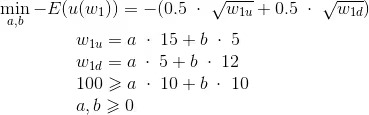

In [47]:
import math
def Eu(p):
    s, b = p
    return -(0.5 * math.sqrt(s * 15 + b * 5) + 0.5 * math.sqrt(s * 5 + b * 12))
cons = ({'type':'ineq','fun':lambda p:100 - p[0] * 10 - p[1] * 10}) #字典对象形式的不等式约束
bnds =((0,1000),(0,1000))#参数边界值
result = sco.minimize(Eu, [5,5],method='SLSQP',bounds=bnds, constraints=cons)    #约束优化

In [48]:
result

     fun: -9.700883611487832
     jac: array([-0.48508096, -0.48489535])
 message: 'Optimization terminated successfully'
    nfev: 16
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([8.02547122, 1.97452878])

# 11.3积分 
金融衍生品估值往往归结为积分计算

In [50]:
import scipy.integrate as sci
def f(x):#示例函数
    return np.sin(x) + 0.5 * x
x = np.linspace(0, 10)
y = f(x)
a = 0.5#积分左届
b = 9.5#积分右届
Ix = np.linspace(a, b)#积分区间
Iy = f(Ix)#积分函数值

In [53]:
Iy

array([0.72942554, 0.9734819 , 1.19628895, 1.3934407 , 1.56139422,
       1.69758885, 1.80053234, 1.86985104, 1.90630248, 1.9117499 ,
       1.88909953, 1.84220287, 1.77572706, 1.69499793, 1.60582081,
       1.51428523, 1.42656004, 1.34868593, 1.28637217, 1.24480458,
       1.22847104, 1.24101052, 1.28509068, 1.36231811, 1.47318429,
       1.61704903, 1.79216207, 1.99572187, 2.22396994, 2.47231725,
       2.73549858, 3.00774969, 3.28300123, 3.55508291, 3.81793106,
       4.06579266, 4.29341883, 4.49624147, 4.67052687, 4.81350135,
       4.92344459, 4.99974745, 5.04293252, 5.05463649, 5.03755514,
       4.99535258, 4.93253808, 4.85431428, 4.76640222, 4.67484888])

Text(0.075, 0.9, '$f(x)$')

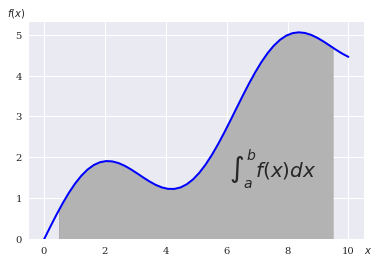

In [54]:
from matplotlib.patches import Polygon
fig, ax = plt.subplots()
plt.plot(x,y,'b',linewidth=2)#把函数曲线用蓝色线条画出来
plt.ylim(bottom=0)#只显示y>0部分
Ix = np.linspace(a, b)#积分区间
Iy = f(Ix)#函数对应值
verts = [(a, 0)] + list(zip(Ix,Iy)) + [(b, 0)]#多边形对应顶点
poly = Polygon(verts, facecolor='0.7',edgecolor='0.5')
ax.add_patch(poly)
plt.text(0.75 * (a + b), 1.5, r'$\int_a^b f(x)dx$',
        horizontalalignment='center', fontsize=20)
plt.figtext(0.9, 0.075, '$x$')
plt.figtext(0.075, 0.9, '$f(x)$')

## 11.3.1 数值积分 
固定高斯求积：sci.fixed_quad()\
自适应求积：sci.quad()\
龙贝格积分：sci.romberg()

In [55]:
sci.fixed_quad(f, a, b)[0]

24.366995967084602

In [56]:
sci.quad(f, a, b)[0]

24.374754718086752

In [58]:
sci.romberg(f, a, b)

24.374754718086713

以ndarray对象为输入\
梯形法则：sci.trapz()\
辛普森法则：sci.simps()

In [59]:
xi = np.linspace(0.5, 9.5, 25)
print(sci.trapz(f(xi),xi))
print(sci.simps(f(xi),xi))

24.352733271544516
24.37496418455075


## 11.3.2通过模拟求取积分 

In [62]:
for i in range(1,20):
    np.random.seed(1000)
    x = np.random.random(i * 10) * (b - a) + a#随机数x的值随循环增加
    print(np.mean(f(x)) * (b - a))#得到积分区间的平均函数值，再乘以积分区间的长度

24.804762279331463
26.522918898332378
26.265547519223976
26.02770339943824
24.99954181440844
23.881810141621663
23.527912274843253
23.507857658961207
23.67236746066989
23.679410416062886
24.424401707879305
24.239005346819056
24.115396924962802
24.424191987566726
23.924933080533783
24.19484212027875
24.117348378249833
24.100690929662274
23.76905109847816


# 11.4 符号数学
python提供sympy（强大符合数学工具，例如解方程）

## 11.4.1 基础知识 

In [64]:
import sympy as sy
x = sy.Symbol('x')#定义所要处理的符号
y = sy.Symbol('y')
print(sy.sqrt(x))#对符号应用函数
print(1 + sy.sqrt(x) + 3**2)#有符号的数值表达式
f = x**2 + 7 + 0.5 * x**2
print(sy.simplify(f))

sqrt(x)
sqrt(x) + 10
1.5*x**2 + 7


## 11.4.2 方程式 

In [65]:
print(sy.solve(x ** 2 - 1))
print(sy.solve(x ** 3 - 4 * x ** 2))
print(sy.solve(x ** 2 + y ** 2))


[-1, 1]
[0, 4]
[{x: -I*y}, {x: I*y}]


## 11.4.3 积分与微分 

In [67]:
a, b = sy.symbols('a b')#积分区间的符号对象
I = sy.Integral(sy.sin(x) + 0.5 * x,(x, a, b))#定义Integral对象
print(sy.pretty(I))#以漂亮格式打印
int_func = sy.integrate(sy.sin(x) + 0.5 * x, x)#得出反导数
print(sy.pretty(int_func))#以漂亮格式打印反导数


b                    
⌠                    
⎮ (0.5⋅x + sin(x)) dx
⌡                    
a                    
      2         
0.25⋅x  - cos(x)


In [69]:
int_func_limits = sy.integrate(sy.sin(x) + 0.5 * x,(x, a, b))#求得积分符号解
print(sy.pretty(int_func_limits))#打印积分符号解
int_func_limits.subs({a : 0.5, b : 9.5}).evalf()#使用字典对象求积分，两步，先求符号解，在用字典带入值
sy.integrate(sy.sin(x) + 0.5 * x,(x, 0.5, 9.5))#一步求得积分


        2         2                  
- 0.25⋅a  + 0.25⋅b  + cos(a) - cos(b)


24.3747547180867

## 11.4.4 微分 

In [72]:
f = (sy.sin(x) + 0.05 * x **2 + sy.sin(y) +0.05 * y ** 2)
del_x =sy.diff(f, x)#求x得偏导
print(del_x)
del_y =sy.diff(f, y)#求y得偏导
print(del_y)
xo = sy.nsolve(del_x, -1.5)#对根和结果最优值进行有根据的推测,猜导数为0 的x解是-1.5
print(xo)
yo = sy.nsolve(del_y, -1.5)
print(yo)
f.subs({x : xo, y : yo}).evalf()#全局最小函数值

0.1*x + cos(x)
0.1*y + cos(y)
-1.42755177876459
-1.42755177876459


-1.77572565314742

In [73]:
xo = sy.nsolve(del_x, 3)#对根和结果最优值进行无根据的推测
print(xo)
yo = sy.nsolve(del_y, 3)
print(yo)
f.subs({x : xo, y : yo}).evalf()#全局最小函数值

1.74632928225285
1.74632928225285


2.27423381055640